In [1]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

cmap = sns.diverging_palette(220, 15, as_cmap=True)


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)


In [2]:
#open file
anofm='anofm_jan.csv'
df=pd.read_csv(anofm)
#print(df)



In [3]:
    judet_order = df['judet'].value_counts().index
    base_color = sns.color_palette()[0]

# Sibiu

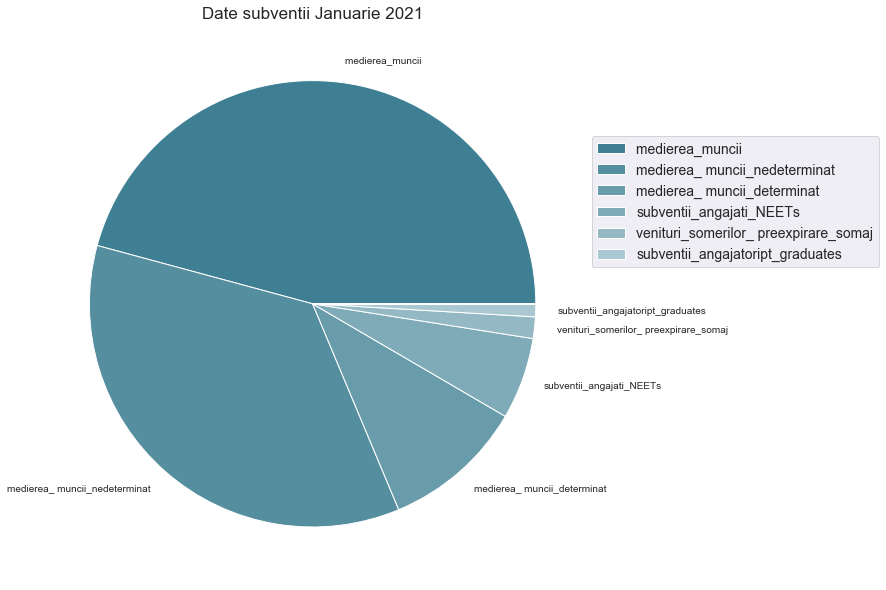

In [4]:
sns.set_style("darkgrid")
df = df.groupby('judet').agg({' Sibiu ': 'sum'}).sort_values(' Sibiu ', ascending=False)

"""OTHERS = df.iloc[15:].sum()
df.drop(df.iloc[15:].index.tolist(), inplace=True)
df.loc['OTHERS'] = OTHERS"""


ax = df.plot.pie(y=' Sibiu ', figsize=(10,20), colormap=cmap)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=14)
plt.ylabel(' ')
plt.title('Date subventii Januarie 2021', fontsize=17)
plt.show()

# Extracting data on needed columns

In [5]:
#open file. Given that data quality seems lower, a new dataset was derived from the original one, with the columns best neeed
# replace nan with 0
#af=af.fillna(0)
an='af.csv'
af=pd.read_csv(an, encoding=('ISO-8859-1'), low_memory=False)
#print(af.head(3))

# Correlations

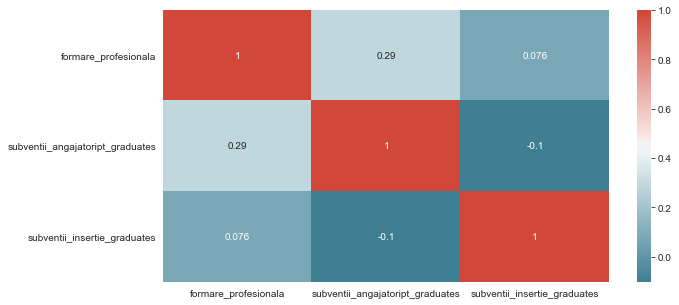

In [6]:
#Crete correlation heatmp to understand what correlated what is not in order to focus further analysis process
plt.figure(figsize=(10,5))
sns.heatmap(af.corr(),cmap=cmap, annot=True)
plt.show()

In [7]:
# Corelations are not so strong, probably because there are many 0 levels. 
#corrs:
# formare & subventii angajatori pt graduates - 0.29
# formare & subventii angajatori pt insertie graduates - 0.076
#

# Unde e nivelul de formare cel mai mare in primele 20 orase ?

In [8]:
# copying data in order to filter first 20 cities 
#copy af DataFrame in x
# filter first 20 cities
# find formare profesionala levels in cities
# come back to the original df

In [9]:
x=af.copy()

In [10]:
#x

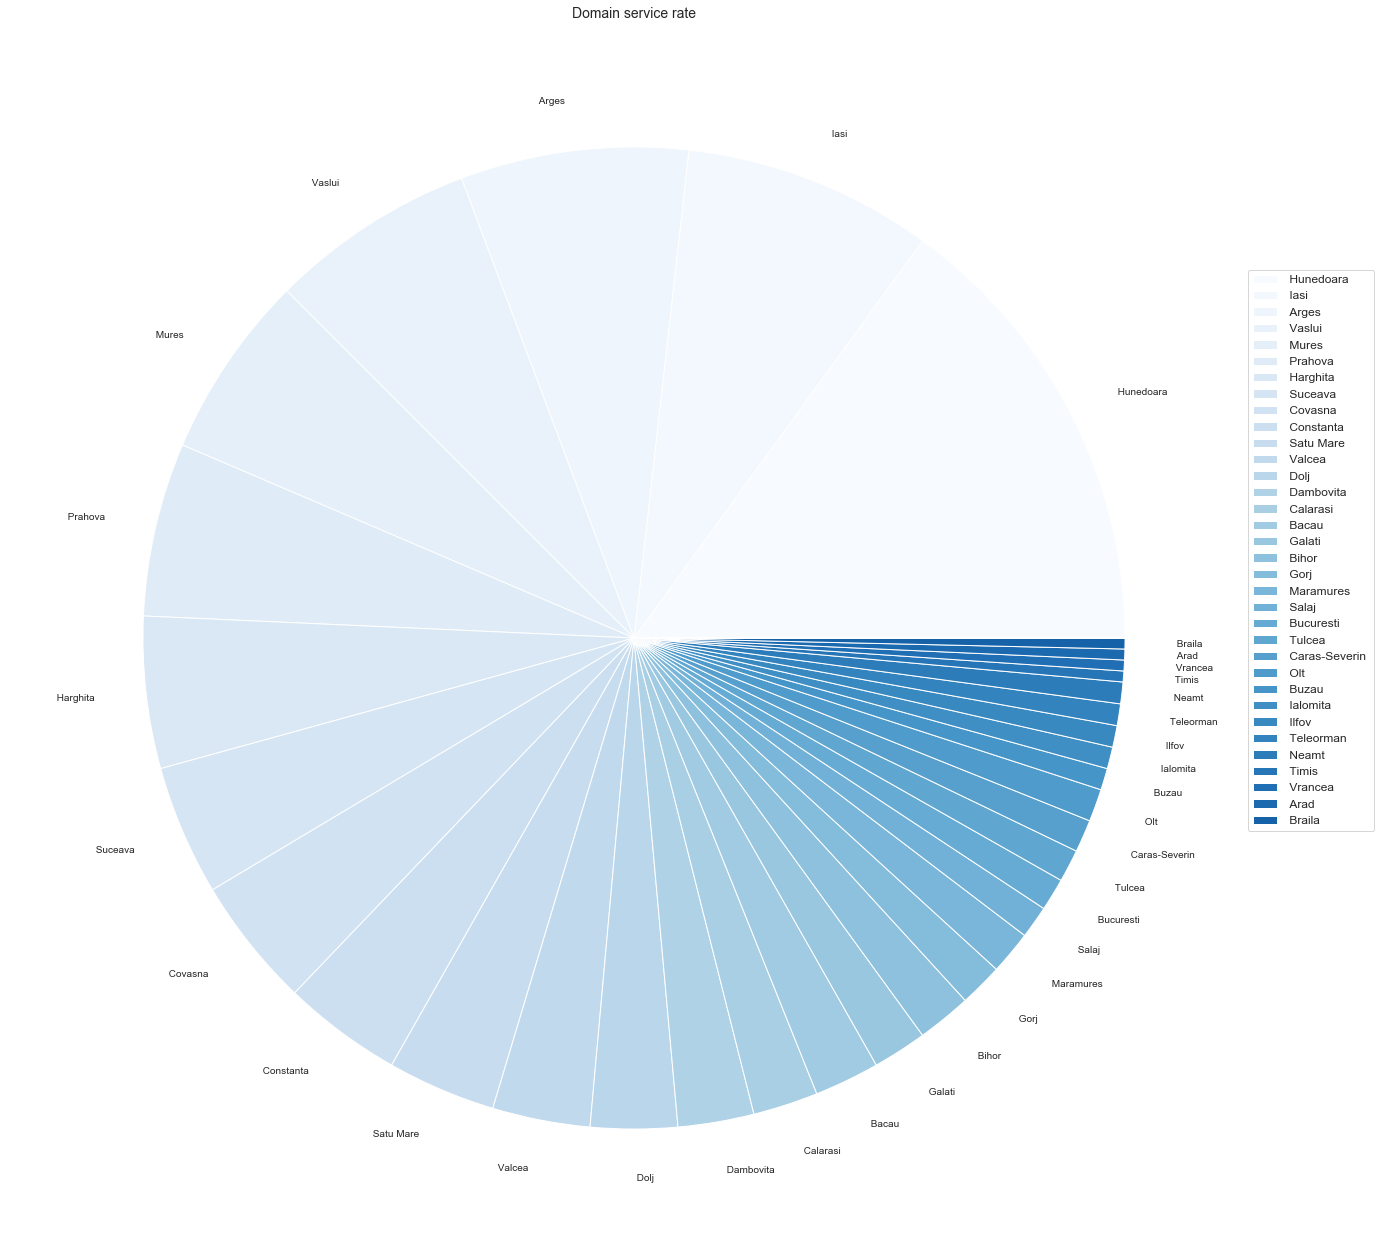

In [30]:
sns.set_style("whitegrid")
df = af.groupby('judet').agg({'formare_profesionala': 'sum'}).sort_values('formare_profesionala', ascending=False)


ax = df.plot.pie(y='formare_profesionala', figsize=(22, 30), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain service rate', fontsize=14)
plt.show()

# Relationship between  formare and support for graduates?

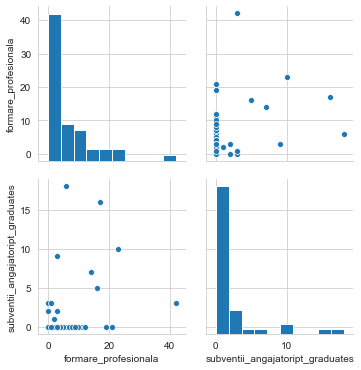

In [34]:
vissual8 = sns.pairplot(af, vars=['formare_profesionala','subventii_angajatoript_graduates'])
plt.show()

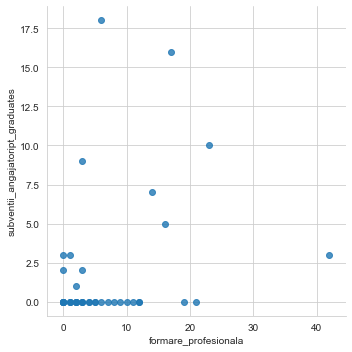

In [31]:
vissual= sns.lmplot(data=af, x='formare_profesionala', y='subventii_angajatoript_graduates',
                 fit_reg=False)
plt.show()

A negative one. Given all regions nd random cities we can see that where there is less support for graduates the level of people taking courses increases. This shows how students feel the need to build on professional expertise in order to reach employment.  

In [14]:
#come back to the original data
# create a df for regiune centru vest
#create crostab table or pie

In [15]:
xf=af.copy()

# Centru Vest anaysis

In [16]:
Centru_Vest=pd.DataFrame({'Judet':['Brasov','Sibiu','Cluj','Mures','Covasna'],'Formare':[0,0,0,17,2],'Subventie_angajator_Graduates':[2,0,3,16,0],'Insertie_Grads':[0,0,0,0,0],'Consultanta Incepere Afacere':[0,0,0,0,0],'Medierea_muncii':[121,147,163,141,181]})

In [17]:
Centru_Vest

,Judet,Formare,Subventie_angajator_Graduates,Insertie_Grads,Consultanta Incepere Afacere,Medierea_muncii
0,Brasov,0,2,0,0,121
1,Sibiu,0,0,0,0,147
2,Cluj,0,3,0,0,163
3,Mures,17,16,0,0,141
4,Covasna,2,0,0,0,181


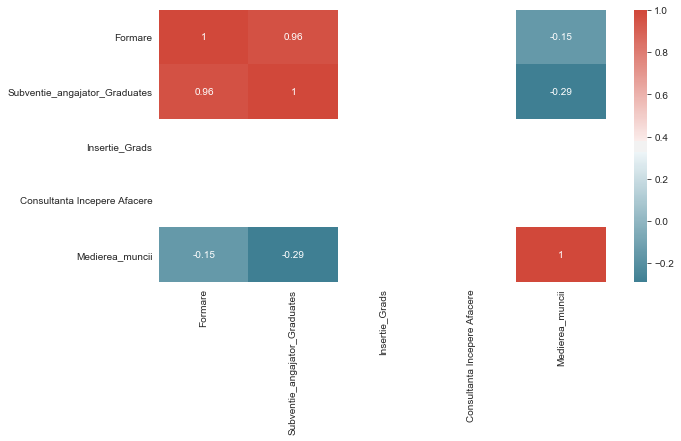

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(Centru_Vest.corr(),cmap=cmap, annot=True)
plt.show()

In [19]:
#Added more columns and therefore more meaning to the correlation map 
#Formare - subventie graduatates became strongly correlated- 0.96
#Mediere muncii-formare - -0.15 
#subventie angajator - medierea muncii -0.29. 
#consultant deschidere afacere - all -0000 cause no levels for other columns. 

# Formare - subventie graduatates 

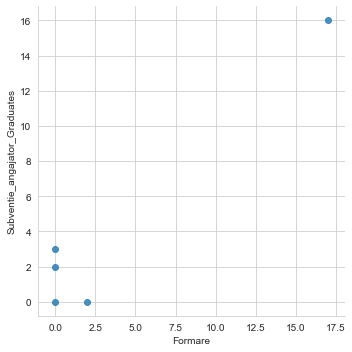

In [20]:
vissual= sns.lmplot(data=Centru_Vest, x='Formare', y='Subventie_angajator_Graduates',
                 fit_reg=False)
plt.show() # the stronger subventia angajator the stronger formarea. 

# Mediere muncii-formare

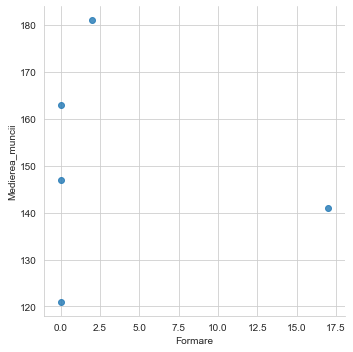

In [21]:
vissual= sns.lmplot(data=Centru_Vest, x='Formare', y='Medierea_muncii',
                 fit_reg=False)
plt.show() 


# subventie angajator - medierea muncii

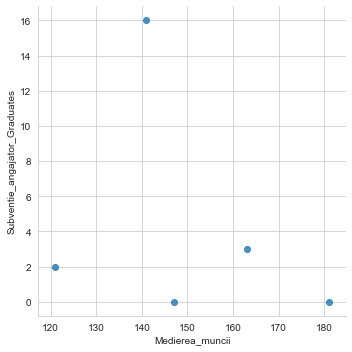

In [22]:
vissual= sns.lmplot(data=Centru_Vest, x='Medierea_muncii', y='Subventie_angajator_Graduates',
                 fit_reg=False)
plt.show() 


# Formare Region Centru-Vest

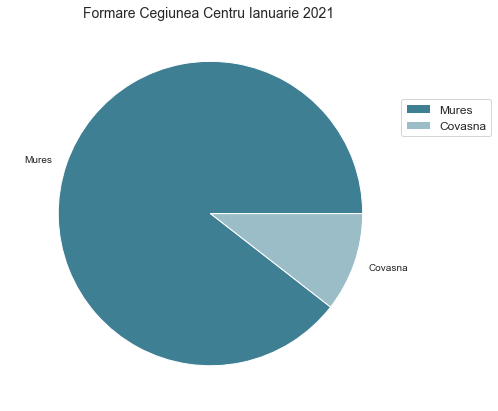

In [23]:
sns.set_style("whitegrid")
df = Centru_Vest.groupby('Judet').agg({'Formare': 'sum'}).sort_values('Formare', ascending=False)


ax = df.plot.pie(y='Formare', figsize=(7, 7), colormap=cmap)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Formare Cegiunea Centru Ianuarie 2021 ', fontsize=14)
plt.show()

# Subventie_angajator_Graduates Centru West

In [24]:
cmap1=sns.diverging_palette(227, 50, as_cmap=True)
Centru=['Judet', 'Subventie_angajator_Graduates']
cm=sns.color_palette=cmap
round(pd.crosstab(Centru_Vest[Centru[0]], Centru_Vest[Centru[1]], values=Centru_Vest['Subventie_angajator_Graduates'],
aggfunc='mean'),2).fillna(0).style.background_gradient(cmap=cm)

Subventie_angajator_Graduates,0,2,3,16
Judet,,,,
Brasov,0.000000,2.000000,0.000000,0.000000
Cluj,0.000000,0.000000,3.000000,0.000000
Covasna,0.000000,0.000000,0.000000,0.000000
Mures,0.000000,0.000000,0.000000,16.000000
Sibiu,0.000000,0.000000,0.000000,0.000000


In [25]:
Centru_Vest=pd.DataFrame({'Judet':['Brasov','Sibiu','Cluj','Mures','Covasna'],'Formare':[0,0,0,17,2],'Subventie_angajator_Graduates':[2,0,3,16,0],'Insertie_Grads':[0,0,0,0,0],'Consultanta Incepere Afacere':[0,0,0,0,0],'Medierea_muncii':[121,147,163,141,181]})

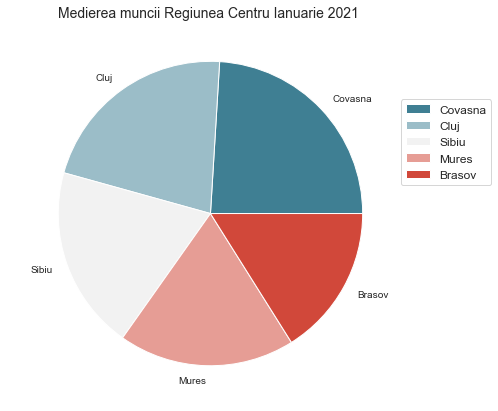

In [26]:
sns.set_style("whitegrid")
df = Centru_Vest.groupby('Judet').agg({'Medierea_muncii': 'sum'}).sort_values('Medierea_muncii', ascending=False)


ax = df.plot.pie(y='Medierea_muncii', figsize=(7, 7), colormap=cmap)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Medierea muncii Regiunea Centru Ianuarie 2021 ', fontsize=14)
plt.show()

# Conclusions central west region

Correlations:
- Formare - subventie graduatates 
- Medier_ muncii-formare 
- Subventie angajator - medierea muncii 
- Consultant deschidere afacere - all -0000 cause no levels for other columns.

Explantions:
- The stronger mediere muncii the lower subventie angajator
- The stronger medierea muncii the lower formarea. 
- The stronger subventia angajator the stronger formarea. 


# Solutions

- Career coaching progrms that support graduates. 
- Career programs should be state supported since not so many have enough funds to pay for tailored career programs 